In [ ]:
# https://chatgpt.com/c/6788eda9-af38-8006-a6eb-53f5829e15dd

Successfully loaded data from: multiclass_spiral_dataset.csv
Dataset Head:
         X1        X2        X3  y
0  0.000000  0.000000 -0.054821  0
1 -0.002426  0.009805 -0.112822  0
2  0.002723  0.020018  0.163735  0
3  0.006808  0.029528  0.078218  0
4  0.001973  0.040356  0.007372  0
Data Shape: (300, 4)


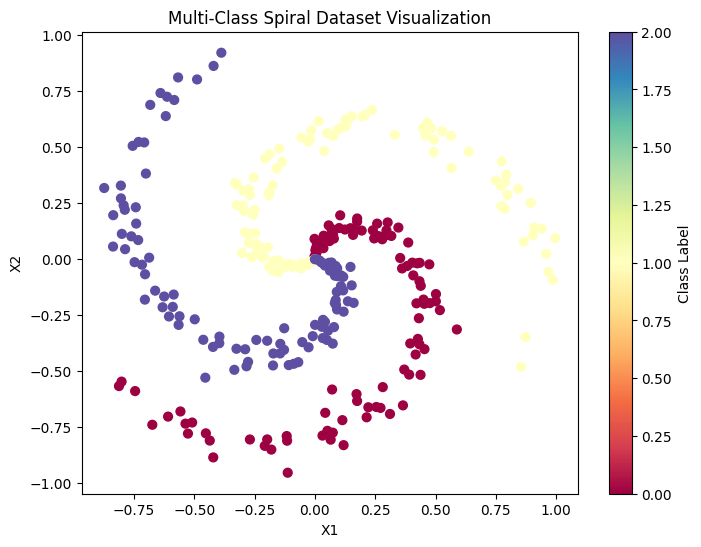

Feature Matrix (X): (300, 3)
Target Labels (y): (300,)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the multi-class spiral dataset
data_path = "multiclass_spiral_dataset.csv"  # Assuming the file is in the same directory
try:
    df = pd.read_csv(data_path)
    print(f"Successfully loaded data from: {data_path}")
except FileNotFoundError:
    print(f"Error: Could not find data file at {data_path}")
    exit()

# Print the first few rows to get a glimpse of the data
print("Dataset Head:")
print(df.head())

# Print the data shape (number of rows, number of columns)
print(f"Data Shape: {df.shape}")

# Visualize the data using scatter plot with color-coded classes
plt.figure(figsize=(8, 6))  # Set plot size for better visualization
plt.scatter(df['X1'], df['X2'], c=df['y'], cmap=plt.cm.Spectral, s=40)
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Class Label')
plt.title("Multi-Class Spiral Dataset Visualization")  # Add a title for clarity
plt.show()

# Extract features (independent variables) from the DataFrame
X = df.iloc[:, :-1].to_numpy()
print(f"Feature Matrix (X): {X.shape}")

# Extract target labels (dependent variable) from the DataFrame
y = df.iloc[:, -1].to_numpy()
print(f"Target Labels (y): {y.shape}")

In [2]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        """
        Initialize the neural network with input, hidden, and output layers.
        """
        self.in_size = input_size  # Input size (features)
        self.h_size = hidden_size  # Hidden layer size (neurons)
        self.out_size = output_size  # Output size (classes)
        
        # Initialize weights and biases
        self.w1 = 0.01 * np.random.randn(self.in_size, self.h_size)  # Weights for input -> hidden
        self.b1 = np.zeros((1, self.h_size))  # Bias for hidden layer
        self.w2 = 0.01 * np.random.randn(self.h_size, self.out_size)  # Weights for hidden -> output
        self.b2 = np.zeros((1, self.out_size))  # Bias for output layer

    def forward(self, X):
        """
        Perform forward propagation through the network.
        """
        # Hidden layer computations
        z1 = np.dot(X, self.w1) + self.b1  # Pre-activation for hidden layer
        a1 = np.maximum(0, z1)  # ReLU activation

        # Output layer computations
        z2 = np.dot(a1, self.w2) + self.b2  # Pre-activation for output layer
        exp_scores = np.exp(z2)  # Exponentiation for softmax
        a2 = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # Softmax activation
        
        return a1, a2  # Return hidden and output activations

    def compute_loss(self, y, probs):
        """
        Compute categorical cross-entropy loss.
        """
        m = y.shape[0]  # Number of samples
        correct_probs = probs[range(m), y]  # Extract probabilities for correct classes
        log_loss = -np.log(correct_probs)  # Compute negative log probabilities
        loss = np.sum(log_loss) / m  # Average loss over all samples
        
        return loss

    def backward(self, X, a1, a2, y, reg):
        """
        Perform backpropagation to calculate gradients for weights and biases.
        """
        m = y.shape[0]  # Number of samples
        
        # Gradient for output layer
        dz2 = a2
        dz2[range(m), y] -= 1  # Subtract 1 for the correct class
        dz2 /= m  # Average over samples
        
        dw2 = np.dot(a1.T, dz2) + reg * self.w2  # Gradient for w2 (with regularization)
        db2 = np.sum(dz2, axis=0, keepdims=True)  # Gradient for b2
        
        # Backpropagate to hidden layer
        da1 = np.dot(dz2, self.w2.T)  # Gradient of activation from hidden layer
        dz1 = da1 * (a1 > 0)  # Apply ReLU derivative
        
        dw1 = np.dot(X.T, dz1) + reg * self.w1  # Gradient for w1 (with regularization)
        db1 = np.sum(dz1, axis=0, keepdims=True)  # Gradient for b1
        
        return dw1, db1, dw2, db2  # Return all gradients

    def train(self, X, y, lr, reg, epochs):
        """
        Train the network using gradient descent.
        """
        for i in range(epochs):
            # Step 1: Forward propagation
            a1, a2 = self.forward(X)
            
            # Step 2: Compute loss
            loss = self.compute_loss(y, a2)
            reg_loss = 0.5 * reg * (np.sum(self.w1**2) + np.sum(self.w2**2))
            total_loss = loss + reg_loss

            # Print loss every 100 iterations
            if i % 100 == 0:
                print(f"Epoch {i}: Loss = {total_loss}")
            
            # Step 3: Backpropagation
            dw1, db1, dw2, db2 = self.backward(X, a1, a2, y, reg)
            
            # Step 4: Update weights and biases
            self.w1 -= lr * dw1
            self.b1 -= lr * db1
            self.w2 -= lr * dw2
            self.b2 -= lr * db2

    def predict(self, X):
        """
        Predict the class labels for the input data.
        """
        _, a2 = self.forward(X)  # Forward pass to get output probabilities
        predictions = np.argmax(a2, axis=1)  # Choose the class with the highest probability
        return predictions


In [3]:
# Create a dataset (e.g., 2D inputs, 3 output classes)
X_train = np.random.randn(100, 2)  # 100 samples, 2 features
y_train = np.random.randint(0, 3, 100)  # 3 classes (0, 1, 2)

# Initialize the neural network
nn = SimpleNN(input_size=2, hidden_size=5, output_size=3)

# Train the model
nn.train(X_train, y_train, lr=0.1, reg=0.01, epochs=1000)

# Predict on new data
predictions = nn.predict(X_train)
print(f"Predictions: {predictions}")


Epoch 0: Loss = 1.0986384240909786
Epoch 100: Loss = 1.0972209124184271
Epoch 200: Loss = 1.096749424841655
Epoch 300: Loss = 1.0940593007820862
Epoch 400: Loss = 1.0833830872029586
Epoch 500: Loss = 1.069467309749147
Epoch 600: Loss = 1.0643080480177871
Epoch 700: Loss = 1.063219068424298
Epoch 800: Loss = 1.062622485368964
Epoch 900: Loss = 1.061789465027623
Predictions: [2 2 2 0 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 0 0 0 2 0
 2 0 0 2 0 0 0 0 2 2 0 0 2 2 2 0 0 0 2 2 0 0 0 2 2 0 2 0 2 0 2 0 0 2 0 2 2
 2 0 0 0 2 2 2 2 0 2 0 0 0 0 2 0 2 2 2 0 0 0 0 0 0 0]
